In [1]:
from yahpo_gym.configuration import config_dict, cfg
from yahpo_gym.benchmark_set import BenchmarkSet
from yahpo_gym import local_config
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
bench = BenchmarkSet("lcbench", active_session=False, check=False)
bench.config.config["model"] = "model_v2.onnx"
bench.active_session
bench.set_session()

Please make sure to also cite:
Zimmer, L., Lindauer, M., & Hutter, F. (2021). Auto-Pytorch: Multi-Fidelity Metalearning for Efficient and Robust AutoDL. IEEE Transactions on Pattern Analysis and Machine Intelligence, 43(9), 3079-3090.
Zimmer, L. (2020). data_2k_lw.zip. figshare. Dataset. https://doi.org/10.6084/m9.figshare.11662422.v1, Apache License, Version 2.0.


In [34]:
df = pd.read_csv(bench.config.get_path("test_dataset"))

In [35]:
def harmonize_dtypes(df1, df2):
    common_columns = df1.columns.intersection(df2.columns)
    
    for col in common_columns:
        if df1[col].dtype != df2[col].dtype:
            try:
                df2[col] = df2[col].astype(df1[col].dtype)
                #print(f"Converted {col} in df2 to {df1[col].dtype}")
            except ValueError:
                try:
                    df1[col] = df1[col].astype(df2[col].dtype)
                    #print(f"Converted {col} in df1 to {df2[col].dtype}")
                except ValueError:
                    print(f"Failed to convert {col}")

def plot_true_lc(ccs, target, dat):
    colors = [
        "#FF0000",
        "#00FF00",
        "#0000FF",
        "#FFFF00",
        "#FF00FF",
        "#00FFFF",
        "#FFA500",
        "#800080",
        "#008000",
        "#000080",
        "#800000",
        "#008080",
        "#808000",
        "#808080",
        "#C0C0C0",
        "#FFC0CB",
        "#FF4500",
        "#00CED1",
        "#FF1493",
        "#9400D3",
    ]
    fidelity_params = bench.config.fidelity_params[0]
    # Subset data to obtain learning curve for config
    for i, cc in enumerate(ccs):
        x = {
            k: list(cc[k].values())[0]
            for k in bench.config_space.get_hyperparameter_names()
        }
        config = pd.DataFrame(data=x, index=[0])
        harmonize_dtypes(tmp, config)
        config.drop(fidelity_params, axis=1, inplace=True)
        pdf = dat.merge(config, on=list(config.columns.values))
        pdf = pdf.sort_values(bench.config.fidelity_params[0])
        plt.plot(
            pdf[bench.config.fidelity_params[0]],
            pdf[target],
            color=colors[i],
            marker="o",
            linestyle="None",
            alpha=0.5,
        )

In [15]:
def plot_lc(ccs, target, fidelity_sequence):
    colors = [
        "#FF0000",
        "#00FF00",
        "#0000FF",
        "#FFFF00",
        "#FF00FF",
        "#00FFFF",
        "#FFA500",
        "#800080",
        "#008000",
        "#000080",
        "#800000",
        "#008080",
        "#808000",
        "#808080",
        "#C0C0C0",
        "#FFC0CB",
        "#FF4500",
        "#00CED1",
        "#FF1493",
        "#9400D3",
    ]
    for i, cc in enumerate(ccs):
        x = {
            k: list(cc[k].values())[0]
            for k in bench.config_space.get_hyperparameter_names()
        }
        x[bench.config.instance_names] = str(x[bench.config.instance_names])
        # (ranger.)replace and (svm.)shrinking must be converted to str
        if "ranger.replace" in x.keys():
            if x["ranger.replace"]:
                x["ranger.replace"] = "TRUE"
            else:
                x["ranger.replace"] = "FALSE"
        if "replace" in x.keys():
            if x["replace"]:
                x["replace"] = "TRUE"
            else:
                x["replace"] = "FALSE"
        if "svm.shrinking" in x.keys():
            if x["svm.shrinking"]:
                x["svm.shrinking"] = "TRUE"
            else:
                x["svm.shrinking"] = "FALSE"
        if "shrinking" in x.keys():
            if x["shrinking"]:
                x["shrinking"] = "TRUE"
            else:
                x["shrinking"] = "FALSE"
        if "repl" in x.keys():
            x["repl"] = str(x["repl"])
        x = {key: value for (key, value) in x.items() if not pd.isna(value)}
        out = []
        for fidelity in fidelity_sequence:
            val = x.copy()
            val.update({bench.config.fidelity_params[0]: fidelity})
            out += [val]

        res = bench.objective_function(out)
        res = [x[target] for x in res]
        plt.plot(fidelity_sequence, res, color=colors[i])

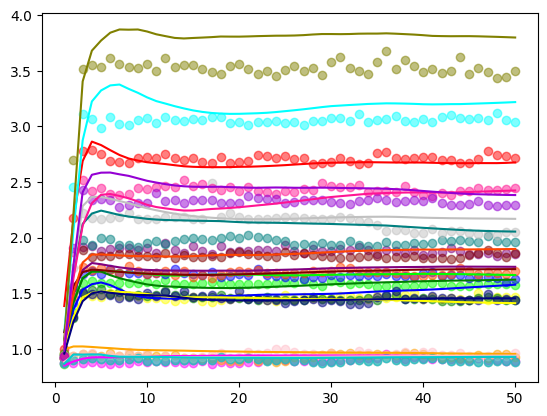

In [49]:
# Draw a sample configuration
tmp = df[df["OpenML_task_id"] == 167152]
#tmp = df[(df["task_id"] == 375) & (df["learner_id"] == "svm") & (df["repl"] == 10)]
ccs = [tmp.sample(1).to_dict() for i in range(20)]
target = "time_increase"
# target = "model_parameters"
#fidelity_sequence = [0.05, 0.10, 0.2, 0.4, 0.6, 0.8, 1.00]
fidelity_sequence = range(1, 51)
plot_true_lc(ccs, target=target, dat=tmp)
plot_lc(ccs, target=target, fidelity_sequence=fidelity_sequence)

In [7]:
ccs

[{'task_id': {1856228: 40981},
  'learner_id': {1856228: 'xgboost'},
  'svm.kernel': {1856228: nan},
  'svm.shrinking': {1856228: nan},
  'ranger.respect.unordered.factors': {1856228: nan},
  'ranger.splitrule': {1856228: nan},
  'ranger.replace': {1856228: nan},
  'aknn.distance': {1856228: nan},
  'xgboost.booster': {1856228: 'gbtree'},
  'num.impute.selected.cpo': {1856228: 'impute.mean'},
  'repl': {1856228: 10},
  'svm.cost': {1856228: nan},
  'svm.gamma': {1856228: nan},
  'svm.tolerance': {1856228: nan},
  'svm.degree': {1856228: nan},
  'glmnet.alpha': {1856228: nan},
  'glmnet.s': {1856228: nan},
  'rpart.cp': {1856228: nan},
  'rpart.maxdepth': {1856228: nan},
  'rpart.minbucket': {1856228: nan},
  'rpart.minsplit': {1856228: nan},
  'ranger.num.trees': {1856228: nan},
  'ranger.sample.fraction': {1856228: nan},
  'ranger.mtry.power': {1856228: nan},
  'ranger.min.node.size': {1856228: nan},
  'ranger.num.random.splits': {1856228: nan},
  'aknn.k': {1856228: nan},
  'aknn.M':

In [15]:
bench = BenchmarkSet("fair_rpart", active_session=False, check=False, noisy=False)
bench.config.config["model"] = "model_v2.onnx"
print(bench.active_session)
bench.set_session()
print(bench._get_model_path())

target = "mmce"

False
/home/lps/Phd/yahpo_data/fair_rpart/model_v2.onnx


In [16]:
def plot_lc_noisy(cc, target, fidelity_sequence):
    colors = [
        "#FF0000",
        "#00FF00",
        "#0000FF",
        "#FFFF00",
        "#FF00FF",
        "#00FFFF",
        "#FFA500",
        "#800080",
        "#008000",
        "#000080",
        "#800000",
        "#008080",
        "#808000",
        "#808080",
        "#C0C0C0",
        "#FFC0CB",
        "#FF4500",
        "#00CED1",
        "#FF1493",
        "#9400D3",
    ]

    for i in range(len(colors)):
        x = {
            k: list(cc[k].values())[0]
            for k in bench.config_space.get_hyperparameter_names()
        }
        x[bench.config.instance_names] = str(x[bench.config.instance_names])
        # FIXME: rbv2_ranger, rbv2_svm, rbv2_super, iaml_ranger, iaml_super
        # replace and shrinking must be converted to str
        if "replace" in x.keys():
            if x["replace"]:
                x["replace"] = "TRUE"
            else:
                x["replace"] = "FALSE"
        if "shrinking" in x.keys():
            if x["shrinking"]:
                x["shrinking"] = "TRUE"
            else:
                x["shrinking"] = "FALSE"
        if "repl" in x.keys():
            x["repl"] = str(x["repl"])
        x = {key: value for (key, value) in x.items() if not pd.isna(value)}
        out = []
        for fidelity in fidelity_sequence:
            val = x.copy()
            val.update({bench.config.fidelity_params[0]: fidelity})
            out += [val]

        res = bench.objective_function(out, seed=i)
        res = [x[target] for x in res]
        plt.plot(fidelity_sequence, res, color=colors[i])

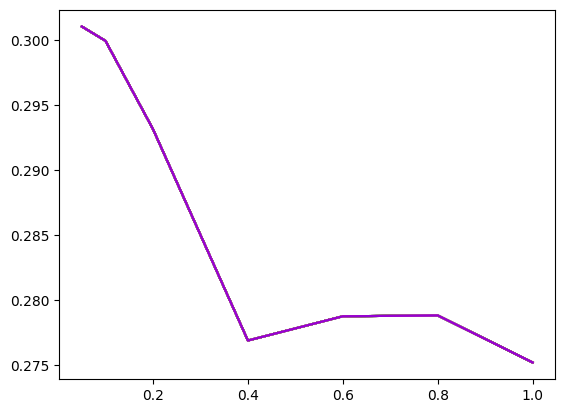

In [17]:
plot_lc_noisy(ccs[8], target, fidelity_sequence)

In [18]:
bench = BenchmarkSet("fair_rpart", active_session=False, check=False, noisy=True)
bench._get_model_path()

'/home/lps/Phd/yahpo_data/fair_rpart/model_v2_noisy.onnx'

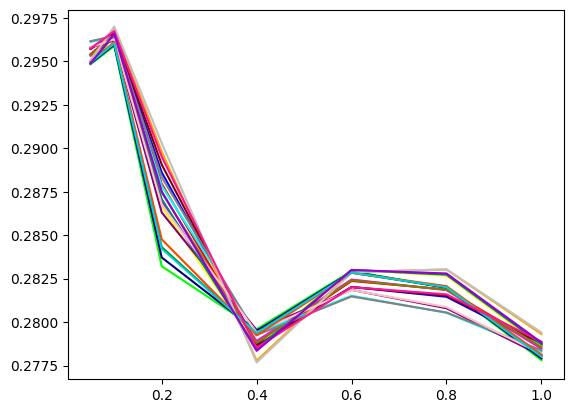

In [19]:
plot_lc_noisy(ccs[8], target, fidelity_sequence)